# Análise e classificação de faces

## Imports e outras inicializações

In [1]:
import warnings
import cv2
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
print(cv2.__version__)
warnings.filterwarnings('ignore')

4.5.1


## Trabalhando com imagens

### Carregando uma imagem

(853, 1280, 3)


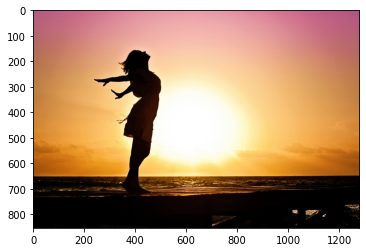

In [2]:
imagem = cv2.imread('./imagens/px-girl.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
print(imagem_rgb.shape)
plt.imshow(imagem_rgb)
plt.show()

### Convertendo para escala de cinza

(853, 1280)


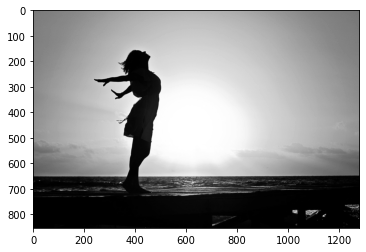

In [3]:
imagem_gray = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2GRAY)
print(imagem_gray.shape)
plt.imshow(imagem_gray, cmap='gray')
plt.show()

### Definindo regiões de interesse (ROI)

(853, 1280, 3)


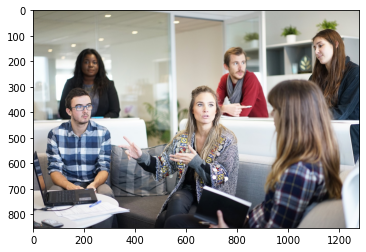

In [4]:
imagem = cv2.imread('./imagens/px-people.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
print(imagem.shape)
plt.imshow(imagem)
plt.show()

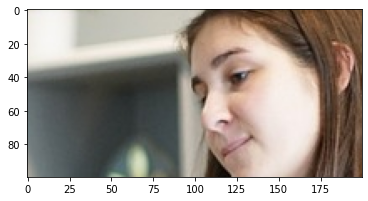

In [5]:
imagem_roi = imagem[100:200, 1000:1200]
plt.imshow(imagem_roi)
plt.show()

In [6]:
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite('./imagens/imagem_roi.png', imagem_roi_bgr)

True

### Slice Notation

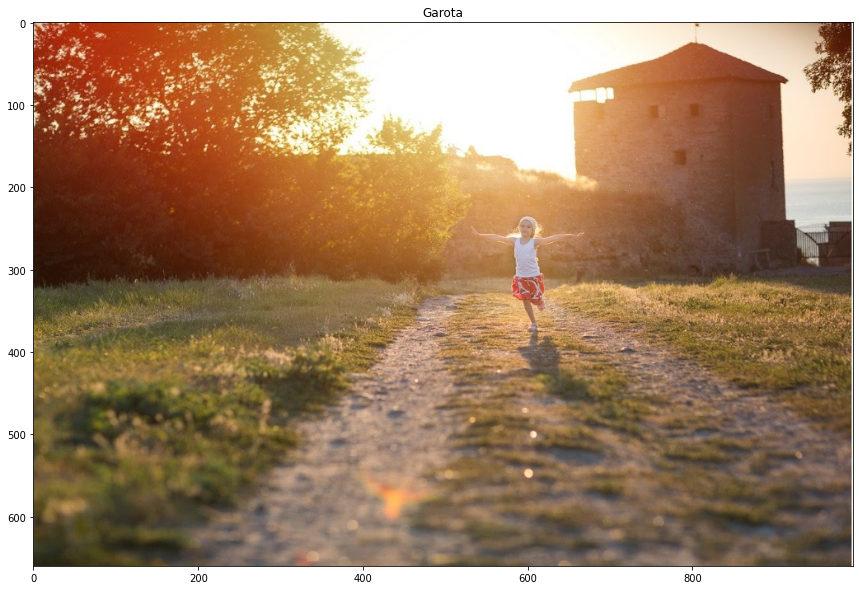

In [7]:
imagem = cv2.imread('./imagens/garota.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title('Garota')
plt.show()

### Recortando a imagem e convertendo para escala de cinza

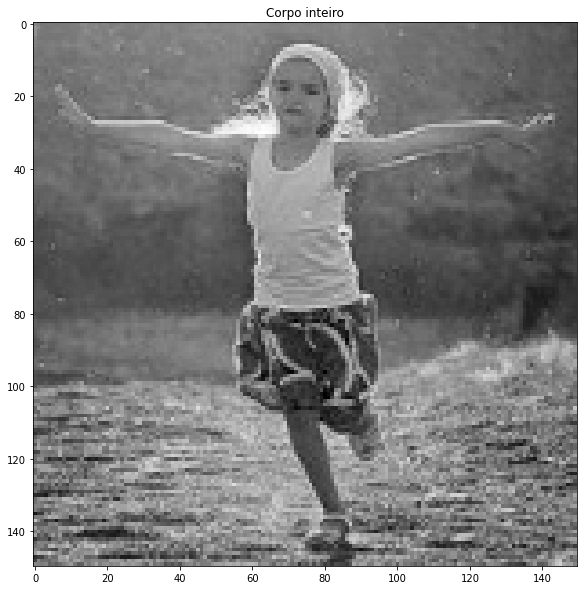

In [8]:
roi = imagem[230:380, 525:675]
roi_gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(roi_gray, cmap='gray')
plt.title('Corpo inteiro')
plt.show()

### Demarcando a área de interesse

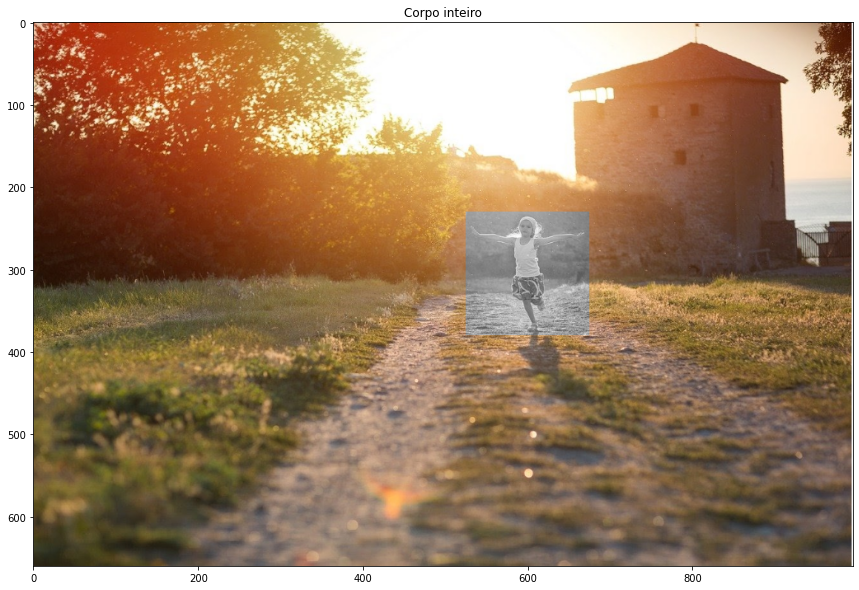

In [9]:
roi_rgb = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)
imagem[230:380, 525:675] = roi_rgb
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title('Corpo inteiro')
plt.show()

### Salvando a imagem editada

In [10]:
imagem_roi_bgr = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR)
cv2.imwrite('./imagens/garota_roi.png', imagem_roi_bgr)

True

## Classificador em cascata de Haar

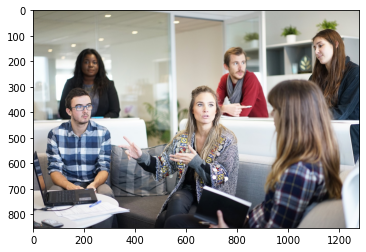

In [11]:
imagem = cv2.imread('./imagens/px-people.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.show()

### Detectando as faces

In [12]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
classificador = cv2.CascadeClassifier('./classificadores/haarcascade_frontalface_default.xml')
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)

### Anotando a imagem

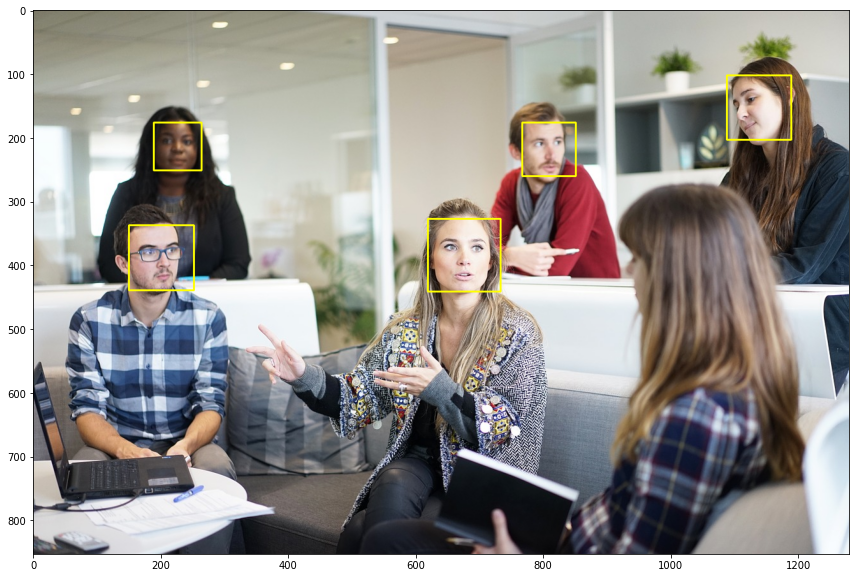

In [13]:
imagem_anotada = imagem.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(imagem_anotada, (x, y), (x+w, y+h), (255, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(imagem_anotada)
plt.show()

### Salvando as faces reconhecidas

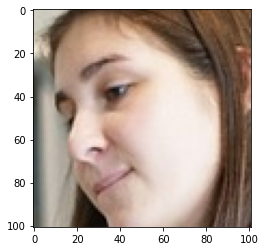

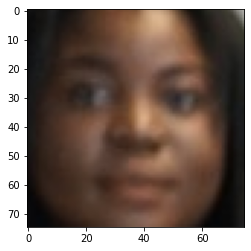

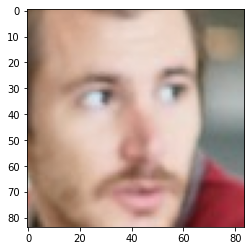

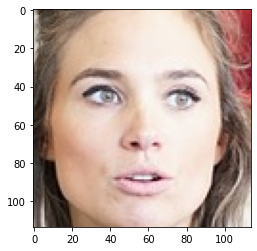

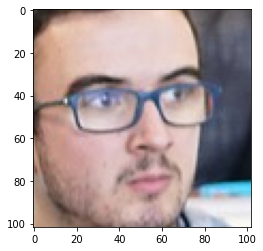

In [14]:
faces_imagem = 0
for (x, y, w, h) in faces:
    faces_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
   
    plt.imshow(imagem_roi)
    plt.show()
    
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)    
    cv2.imwrite('./imagens/face_'+str(faces_imagem)+'.png', imagem_roi)